# 0. Unzipping `Gender01.zip` folder

In [1]:
!unzip Gender01.zip

Archive:  Gender01.zip
  inflating: Gender01/list_test.txt  
  inflating: Gender01/list_train.txt  
  inflating: Gender01/test/female/JPCNN001.png  
  inflating: Gender01/test/female/JPCNN003.png  
  inflating: Gender01/test/female/JPCNN009.png  
  inflating: Gender01/test/female/JPCNN013.png  
  inflating: Gender01/test/female/JPCNN015.png  
  inflating: Gender01/test/female/JPCNN017.png  
  inflating: Gender01/test/female/JPCNN018.png  
  inflating: Gender01/test/female/JPCNN019.png  
  inflating: Gender01/test/female/JPCNN021.png  
  inflating: Gender01/test/female/JPCNN024.png  
  inflating: Gender01/test/female/JPCNN027.png  
  inflating: Gender01/test/female/JPCNN028.png  
  inflating: Gender01/test/female/JPCNN029.png  
  inflating: Gender01/test/female/JPCNN030.png  
  inflating: Gender01/test/female/JPCNN038.png  
  inflating: Gender01/test/female/JPCNN040.png  
  inflating: Gender01/test/female/JPCNN042.png  
  inflating: Gender01/test/female/JPCNN043.png  
  inflating: Gende

# 1. Creating `datasets`

In [2]:
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [4]:
train_dir = 'Gender01/train'
test_dir = 'Gender01/test'

train_dir, test_dir

('Gender01/train', 'Gender01/test')

In [5]:
data_transform = transforms.Compose([
    transforms.ToTensor()
])

In [6]:
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 154
     Root location: Gender01/train
     StandardTransform
 Transform: Compose(
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 93
     Root location: Gender01/test
     StandardTransform
 Transform: Compose(
                ToTensor()
            ))

In [7]:
class_names = train_data.classes
class_names

['female', 'male']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'female': 0, 'male': 1}

# 2. Visualizing the data

In [9]:
len(train_data[2])

2

In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
img, label = train_data[0]
class_names[label]

'female'

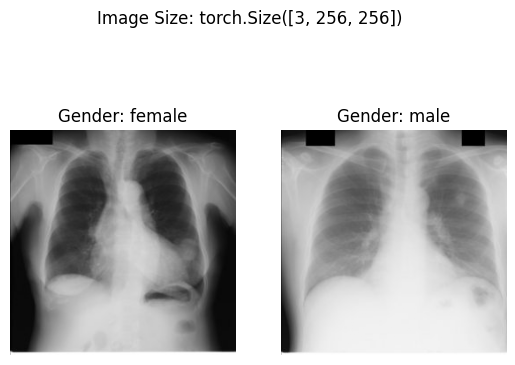

In [12]:
# Visualizing images from both the genders

img1, label1 = train_data[0]
img2, label2 = train_data[100]

img1_transformed = np.array(img1.permute(1, 2, 0))
img2_transformed = np.array(img2.permute(1, 2, 0))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(img1_transformed)
ax[0].set_title(f"Gender: {class_names[label1]}")
ax[0].axis(False)

ax[1].imshow(img2_transformed)
ax[1].set_title(f"Gender: {class_names[label2]}")
ax[1].axis("off")

fig.suptitle(f"Image Size: {img1.shape}");

# 3. Creating `DataLoader`'s

In [13]:
import os
os.cpu_count()

2

In [14]:
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=32,
                              shuffle=True,
                              num_workers=os.cpu_count())
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=32,
                             num_workers=os.cpu_count())

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7e7767e18940>,
 <torch.utils.data.dataloader.DataLoader at 0x7e7767de7d90>)

In [15]:
for img, label in train_dataloader:
  print(f"Image Size: {img.shape}\nLabel: {label}")
  break

Image Size: torch.Size([32, 3, 256, 256])
Label: tensor([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0])


In [16]:
img, label = next(iter(train_dataloader))
print("Image Size:", img.shape)
print("Label Size:", label.shape)
print(f"Label: {label}")

Image Size: torch.Size([32, 3, 256, 256])
Label Size: torch.Size([32])
Label: tensor([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1])


# 4. Building a Model

In [17]:
from torch import nn
from torchvision import models

In [18]:
resnet18 = models.resnet18(pretrained=True)
num_features = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_features, 2)
resnet18 = resnet18.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 153MB/s]


In [19]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# 5. Setting up `Optimizer` and `Loss Function`

In [20]:
import torch.optim as optim

In [21]:
LEARNING_RATE = 0.001

optimizer = optim.Adam(params=resnet18.parameters(),
                       lr = LEARNING_RATE)
loss_fn = nn.CrossEntropyLoss()

# 6. Building `train` and `test` step

In [22]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               optimizer: torch.optim.Optimizer,
               loss_fn: torch.nn.Module,
               device: torch.device):
  """Performs a train step"""

  train_loss, train_acc = 0, 0
  model.to(device)
  model.train()

  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_preds = model(X)

    loss = loss_fn(y_preds.squeeze(), y)
    train_loss += loss.item()
    train_acc += (torch.eq(y_preds.argmax(dim=1), y).sum().item() / len(y_preds)) * 100

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"train_loss: {train_loss:.4f} | train_acc: {train_acc:.2f}")

In [23]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):
  """Performs a test step"""

  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      y_test_preds = model(X)

      loss = loss_fn(y_test_preds.squeeze(), y)
      test_loss += loss.item()
      test_acc += (torch.eq(y_test_preds.argmax(dim=1), y).sum().item() / len(y_test_preds)) * 100

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"test_loss: {test_loss:.4f} | test_acc: {test_acc:.2f}")

In [24]:
from tqdm.auto import tqdm

EPOCHS = 10

for epoch in tqdm(range(EPOCHS)):
  print(f"Epoch: {epoch}\n-----------")

  train_step(model=resnet18,
             data_loader=train_dataloader,
             optimizer=optimizer,
             loss_fn=loss_fn,
             device=device)

  test_step(resnet18, test_dataloader, loss_fn, device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----------
train_loss: 0.4575 | train_acc: 76.73
test_loss: 2.7705 | test_acc: 57.33
Epoch: 1
-----------
train_loss: 0.1691 | train_acc: 94.09
test_loss: 0.8833 | test_acc: 87.28
Epoch: 2
-----------
train_loss: 0.1005 | train_acc: 95.00
test_loss: 2.6472 | test_acc: 62.64
Epoch: 3
-----------
train_loss: 0.0659 | train_acc: 97.50
test_loss: 0.8034 | test_acc: 75.79
Epoch: 4
-----------
train_loss: 0.0144 | train_acc: 100.00
test_loss: 0.4218 | test_acc: 87.07
Epoch: 5
-----------
train_loss: 0.0170 | train_acc: 99.23
test_loss: 0.4408 | test_acc: 87.07
Epoch: 6
-----------
train_loss: 0.0098 | train_acc: 99.38
test_loss: 0.4136 | test_acc: 85.81
Epoch: 7
-----------
train_loss: 0.0082 | train_acc: 100.00
test_loss: 0.3887 | test_acc: 87.07
Epoch: 8
-----------
train_loss: 0.0029 | train_acc: 100.00
test_loss: 0.4080 | test_acc: 91.45
Epoch: 9
-----------
train_loss: 0.0140 | train_acc: 99.38
test_loss: 1.2600 | test_acc: 74.89


# 7. Visualizing Predictions

In [25]:
# Take 9 random samples from test data
import random

random_samples = []
random_labels = []

for samples, labels in random.sample(list(test_data), k=9):
  random_samples.append(samples)
  random_labels.append(labels)

len(random_samples), len(random_labels)

(9, 9)

In [26]:
# Function to make predictions on this data list
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device):
  """Makes predictions on data from list"""

  pred_probs = []

  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = sample.unsqueeze(dim=0).to(device)
      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [27]:
pred_probs = make_predictions(model=resnet18,
                 data=random_samples,
                 device=device)
pred_probs[:2]

tensor([[5.0964e-12, 1.0000e+00],
        [3.4904e-01, 6.5096e-01]])

In [28]:
pred_classes = torch.argmax(pred_probs, dim=1)
pred_classes

tensor([1, 1, 1, 1, 1, 1, 1, 0, 1])

In [29]:
random_labels, pred_classes

([0, 1, 1, 0, 1, 1, 1, 0, 1], tensor([1, 1, 1, 1, 1, 1, 1, 0, 1]))

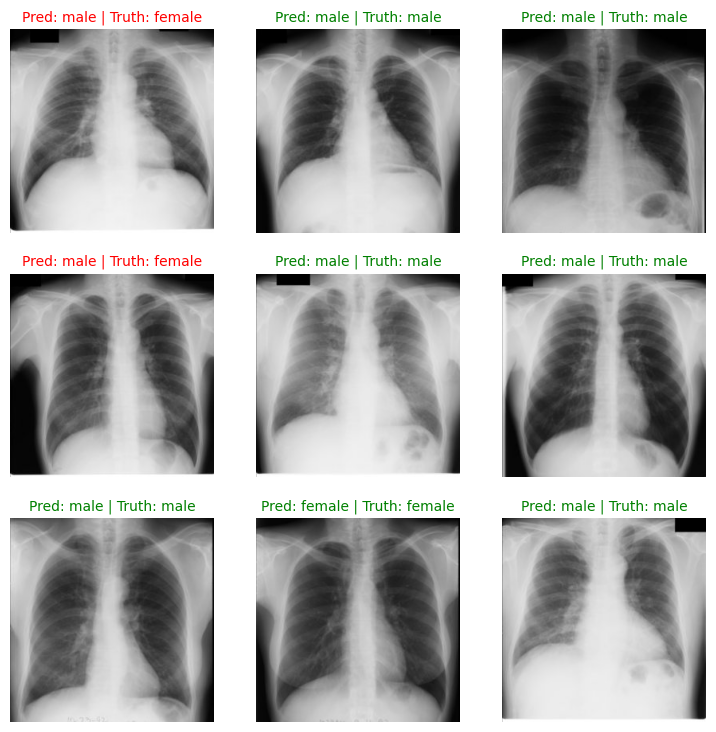

In [30]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(random_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.permute(1, 2, 0))

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[random_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);